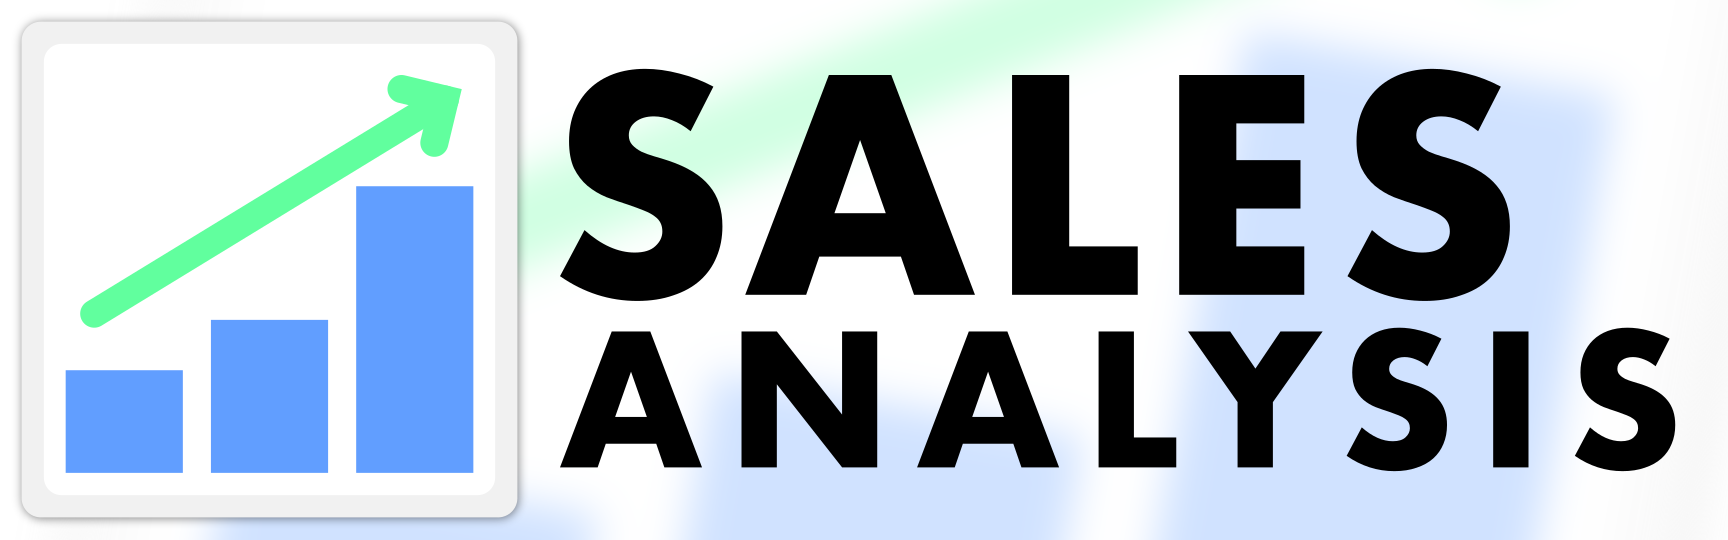

<b><font face="Book Antiqua" size="6" >Exploratory Data Analysis -Sales Force</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./Store Sales.csv', parse_dates=['Order Date', 'Ship Date'])

In [3]:
pd.set_option('display.max_columns', None)

<b><font face="Book Antiqua" size="4" >Overview</b></font>

In [23]:
df.head(10)

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [24]:
df.tail(10)

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub,Product Name,Sales
9790,9791,CA-2018-144491,2018-03-27,2018-01-04,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.246
9791,9792,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,Central,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,56.064
9792,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,Central,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.772
9793,9794,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,Central,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.832
9794,9795,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,18.240
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [25]:
df.sample(10)

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub,Product Name,Sales
4776,4777,CA-2017-101630,2017-02-19,2017-02-23,Second Class,CK-12760,Cyma Kinney,Corporate,United States,Long Beach,New York,East,OFF-LA-10004425,Office Supplies,Labels,Staple-on labels,8.670
4656,4657,CA-2016-112130,2016-03-05,2016-07-05,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-AR-10001468,Office Supplies,Art,Sanford Prismacolor Professional Thick Lead Ar...,59.904
1386,1387,US-2017-108504,2017-05-02,2017-05-02,Same Day,PP-18955,Paul Prost,Home Office,United States,Smyrna,Georgia,South,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",239.980
4635,4636,CA-2018-116288,2018-12-03,2018-03-17,Standard Class,BS-11380,Bill Stewart,Corporate,United States,San Francisco,California,West,OFF-ST-10000736,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,242.940
2558,2559,CA-2016-147788,2016-05-31,2016-04-06,Standard Class,TM-21010,Tamara Manning,Consumer,United States,Orem,Utah,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,1406.860
711,712,CA-2018-146136,2018-03-09,2018-07-09,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Palm Coast,Florida,South,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",24.448
4574,4575,CA-2017-139395,2017-12-12,2017-12-18,Standard Class,MG-17650,Matthew Grinstein,Home Office,United States,Jackson,Michigan,Central,FUR-FU-10003724,Furniture,Furnishings,Westinghouse Clip-On Gooseneck Lamps,33.480
395,396,CA-2018-165603,2018-10-17,2018-10-19,Second Class,SS-20140,Saphhira Shifley,Corporate,United States,Warwick,Rhode Island,East,OFF-ST-10000798,Office Supplies,Storage,2300 Heavy-Duty Transfer File Systems by Perma,49.960
942,943,CA-2017-142958,2017-12-13,2017-12-20,Standard Class,RW-19630,Rob Williams,Corporate,United States,Torrance,California,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1114.272
8090,8091,CA-2015-101392,2015-07-12,2015-12-13,Standard Class,AS-10630,Ann Steele,Home Office,United States,Seattle,Washington,West,OFF-ST-10000532,Office Supplies,Storage,Advantus Rolling Drawer Organizers,269.360


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   OrderDate      9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub            9800 non-null   object        
 15  Product Name   9800 n

In [27]:
df.describe()

,Row ID,Sales
count,9800.000000,9800.000000
mean,4900.500000,230.769059
std,2829.160653,626.651875
min,1.000000,0.444000
25%,2450.750000,17.248000
50%,4900.500000,54.490000
75%,7350.250000,210.605000
max,9800.000000,22638.480000


<b><font face="Book Antiqua" size="4" >DataCleaning</b></font>

In [28]:
df.isna().mean()*100

Row ID           0.0
Order ID         0.0
OrderDate        0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub              0.0
Product Name     0.0
Sales            0.0
dtype: float64

In [51]:
df.duplicated().sum()  

0

<b><font face="Book Antiqua" size="2" color="red">Clean Dataset</b></font>

In [ ]:
# 

<b><font face="Book Antiqua" size="4" >Dropping Irrelevant Columns and Renaming Columns</b></font>

In [4]:
df.drop(columns=['Postal Code'],inplace=True)

In [9]:
df.rename(columns={'Order Date':"OrderDate", 'Sub-Category':'Sub'},inplace=True)

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'OrderDate', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub', 'Product Name', 'Sales'],
      dtype='object')

<b><font face="Book Antiqua" size="2" color="Brown">Finding Shipping Delay</b></font>

In [33]:
df['Delay']=df['OrderDate']-df['Ship Date']

In [48]:
df['Delay']=df.Delay.astype('str')

df['Delay']=df['Delay'].str.replace('\D',"",regex=True )

df['Delay']=df.Delay.astype('int')

In [49]:
df

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub,Product Name,Sales,Delay,Week,Date,WeekDay,OrderWeek
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,32,2017-08-11,4,32
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,32,2017-08-11,4,32
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,173,49,2017-12-06,2,49
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,23,45,2016-11-10,3,45
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,23,45,2016-11-10,3,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7,20,2017-05-21,6,20
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,319,48,2016-12-01,3,48
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,319,48,2016-12-01,3,48
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,319,48,2016-12-01,3,48


and drop the Column 
This cleaning is on continuous basis.

<b><font face="Book Antiqua" size="2" color="Brown">Adding Date and Week Columns</b></font>

In [50]:
df['OrderWeekday']=df.OrderDate.dt.weekday

AttributeError: Can only use .dt accessor with datetimelike values

In [46]:
df['OrderWeekDay']=df.OrderDate.dt.weekday

AttributeError: Can only use .dt accessor with datetimelike values

In [47]:
df['OrderDate']=df.OrderDate.dt.date

AttributeError: Can only use .dt accessor with datetimelike values

##### delete the column date after  New Column

In [61]:
df.Week

0       32
1       32
2       49
3       45
4       45
        ..
9795    20
9796    48
9797    48
9798    48
9799    48
Name: Week, Length: 9800, dtype: int64

In [56]:
df.delay_modulus

0        92
1        92
2       173
3        23
4        23
       ... 
9795      7
9796    319
9797    319
9798    319
9799    319
Name: delay_modulus, Length: 9800, dtype: int32

In [41]:
df

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub,Product Name,Sales,Delay,Week,Date,WeekDay
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92,32,2017-08-11,4
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92,32,2017-08-11,4
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,173,49,2017-12-06,2
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,23,45,2016-11-10,3
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,23,45,2016-11-10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7,20,2017-05-21,6
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,319,48,2016-12-01,3
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,319,48,2016-12-01,3
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,319,48,2016-12-01,3


In [13]:
df['ShippingDelay']=df['Ship Date']-df['Order Date']

In [ ]:
df['Date']=-df.-column name-.dt.year

ibuteError: 'StringMethods' object has no attribute 'astype'

<b><font face="Book Antiqua" size="3" color="red">#Dates are not logically ordered</b></font>

Category Sales
sub Sales
graph plot 


In [12]:
Furni_item_mean=df.groupby(['Sub'])['Sales'].mean()

In [15]:
Furni_item.sort_values(ascending=False)

Sub
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

value counts of furniture?


#### The most sold furniture?


In [56]:
Furni_item=df.groupby(['Sub','Category'])['Sales'].sum()

In [57]:
Furni_item

Sub          Category       
Accessories  Technology         164186.7000
Appliances   Office Supplies    104618.4030
Art          Office Supplies     26705.4100
Binders      Office Supplies    200028.7850
Bookcases    Furniture          113813.1987
Chairs       Furniture          322822.7310
Copiers      Technology         146248.0940
Envelopes    Office Supplies     16128.0460
Fasteners    Office Supplies      3001.9600
Furnishings  Furniture           89212.0180
Labels       Office Supplies     12347.7260
Machines     Technology         189238.6310
Paper        Office Supplies     76828.3040
Phones       Technology         327782.4480
Storage      Office Supplies    219343.3920
Supplies     Office Supplies     46420.3080
Tables       Furniture          202810.6280
Name: Sales, dtype: float64

In [63]:
D_max=df.Delay.max()

In [65]:
df.Delay.value_counts().sort_values(ascending=False)

4      1358
5      1069
2       706
6       537
3       514
       ... 
321       1
51        1
109       1
293       1
317       1
Name: Delay, Length: 143, dtype: int64

In [68]:
# Sales Progress 
Sales_Progresss = df.groupby('OrderWeek')['Sales'].sum()


❓

sb.barplot(x='Sales', y='Orderweek' data=Sales_Progresss)

##### q Sement==Home Office
##### g. yr [sales]

🟢The most sold itemwise not in cash

In [76]:
Grp_2=df.groupby([ 'Category','Sub'] )['Sales']

In [79]:
Grp_2.value_counts()

Category    Sub        Sales   
Furniture   Bookcases  141.960     4
                       241.960     3
                       61.960      2
                       115.960     2
                       119.833     2
                                  ..
Technology  Phones     3023.928    1
                       3499.930    1
                       4158.912    1
                       4367.896    1
                       4548.810    1
Name: Sales, Length: 6861, dtype: int64

In [ ]:
Grp_